# Calculations done using Master Noise Excel

Approximation using linear averages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CIB Calculations from Master Noise

In [13]:
CIB_data = pd.read_excel("Master Noise-e.xlsm", sheet_name="CIB", header=18)
CIB_data

,Wavelength (m),Wavelength (microns),Frequency (Hz),Frequncy (THz),W sr-1 m-2 Hz-1,W arcsec-2 m-2 Hz-1,MJy sr-1,W sr-1 m-2 micron-1,W arcsec-2 m-2 micron-1,photons m-2 s-1 sr-1 Hz-1,photons m-2 s-1 arcsec-2 Hz-1,photons m-2 s-1 sr-1 micron-1,photons m-2 s-1 arcsec-2 micron-1,photons s-1 micron-1 (assume diffraction limited - A Omega = labda^2),Antenna Temp (K),photons s-1 Hz-1 (assume diffraction limited - A Omega = labda^2)
0,2.203100e-07,0.22031,1.360775e+15,1360.775489,1.318078e-24,3.097483e-35,0.000132,8.141293e-09,1.913204e-19,0.000001,3.435314e-17,9.029233e+09,0.212187,0.000438,2.316839e-15,7.094878e-20
1,2.444700e-07,0.24447,1.226295e+15,1226.295447,1.631625e-24,3.834320e-35,0.000163,8.184459e-09,1.923348e-19,0.000002,4.718861e-17,1.007254e+10,0.236705,0.000602,3.531490e-15,1.200047e-19
2,2.625100e-07,0.26251,1.142023e+15,1142.022963,1.903845e-24,4.474036e-35,0.000190,8.282483e-09,1.946384e-19,0.000003,5.912465e-17,1.094535e+10,0.257216,0.000754,4.751270e-15,1.733686e-19
3,2.803400e-07,0.28034,1.069389e+15,1069.388771,2.180541e-24,5.124271e-35,0.000218,8.317920e-09,1.954711e-19,0.000003,7.231700e-17,1.173878e+10,0.275861,0.000923,6.206128e-15,2.418358e-19
4,3.037800e-07,0.30378,9.868736e+14,986.873553,2.571356e-24,6.042687e-35,0.000257,8.353424e-09,1.963055e-19,0.000004,9.240863e-17,1.277459e+10,0.300203,0.001179,8.593438e-15,3.628615e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7.959880e-04,795.98800,3.766294e+11,0.376629,2.164039e-21,5.085492e-32,0.216404,1.023936e-12,2.406250e-23,8.671514,2.037806e-10,4.103010e+09,0.096421,2599.654509,4.965518e-05,5.493965e-06
140,8.151020e-04,815.10200,3.677975e+11,0.367797,2.057211e-21,4.834447e-32,0.205721,9.282730e-13,2.181442e-23,8.441394,1.983728e-10,3.809000e+09,0.089511,2530.666218,4.949818e-05,5.608104e-06
141,8.346760e-04,834.67600,3.591722e+11,0.359172,1.858367e-21,4.367163e-32,0.185837,7.996802e-13,1.879249e-23,7.808592,1.835019e-10,3.360141e+09,0.078963,2340.956899,4.688714e-05,5.439845e-06
142,8.423290e-04,842.32900,3.559090e+11,0.355909,1.878144e-21,4.413638e-32,0.187814,7.935714e-13,1.864893e-23,7.964048,1.871551e-10,3.365046e+09,0.079079,2387.561448,4.825905e-05,5.650349e-06


In [15]:
# Extracting data
CIB_microns = CIB_data[['Wavelength (microns)']].to_numpy()
CIB_DL = CIB_data[['photons s-1 micron-1 (assume diffraction limited - A Omega = labda^2)']].to_numpy() # Diffraction Limited photons s^-1 micron^-1

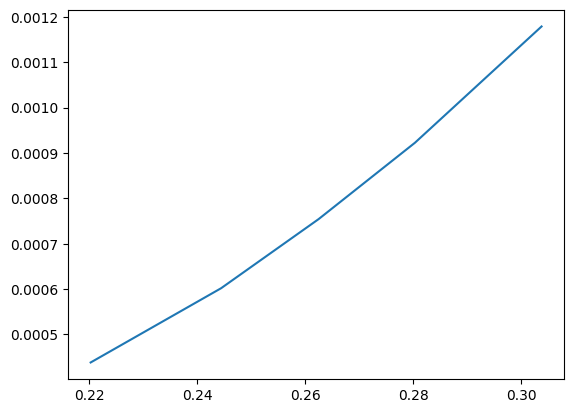

In [40]:
# Plot first couple of data points to check
plt.plot(CIB_microns[0:5], CIB_DL[0:5])

In [41]:
# Kinda linear, so we can use a linear fit
m, b = np.polyfit(CIB_microns[0:5][:,0], CIB_DL[0:5][:,0], 1)
print(m, b)

0.008876698313970303 -0.0015490133113979072


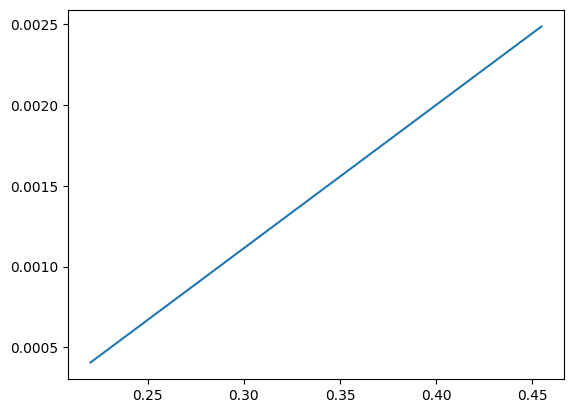

In [42]:
# plot the fit
plt.plot(CIB_microns[0:10], m*CIB_microns[0:10] + b)

In [46]:
# Simply plug into equation
CIB_2nm = m*.2 + b
print(f"Cosmic IR Background at 0.2 microns: {CIB_2nm:.3e} photons s^-1 micron^-1")



Cosmic IR Background at 200 nm: 2.263e-04 photons s^-1 micron^-1


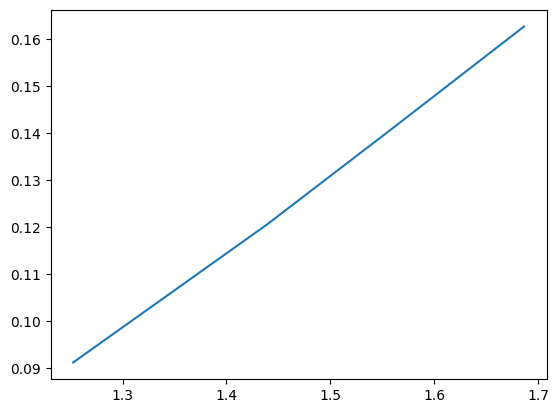

In [50]:
# Data covers around 1.5 microns, so we can do an easy average
# plot around 1.5 microns
plt.plot(CIB_microns[22:26], CIB_DL[22:26])

In [51]:
# Simply do the same linear fit
m, b = np.polyfit(CIB_microns[22:26][:,0], CIB_DL[22:26][:,0], 1)
print(m, b)

0.16471309671590087 -0.11569998797813547


In [52]:
CIB_1_5microns = m*1.5 + b
print(f"Cosmic IR Background at 1.5 microns: {CIB_1_5microns:.3e} photons s^-1 micron^-1")

Cosmic IR Background at 1.5 microns: 1.314e-01 photons s^-1 micron^-1


### Calculations of Cosmic Microwave Background

In [53]:
CMB_data = pd.read_excel("Master Noise-e.xlsm", sheet_name="CMB", header=4)
CMB_data

,Wavelength (m),Wavelength (microns),Frequency (Hz),Frequncy (THz),W sr-1 m-2 Hz-1,W arcsec-2 m-2 Hz-1,MJy sr-1,W sr-1 m-2 micron-1,W arcsec-2 m-2 micron-1,photons m-2 s-1 sr-1 Hz-1,photons m-2 s-1 arcsec-2 Hz-1,photons m-2 s-1 sr-1 micron-1,photons m-2 s-1 arcsec-2 micron-1,photons s-1 micron-1,Antenna Temp (K),photons s-1 Hz-1 (assume diffraction limited - A Omega = labda^2)
0,0.000008,8.48291,3.534076e+13,35.340755,2.348625e-280,5.519269e-291,2.348625e-260,9.784636e-268,2.299390e-278,1.002956e-260,2.356946e-271,4.179365e-248,9.821507e-259,3.007461e-258,6.120541e-268,7.216880e-271
1,0.000009,8.89522,3.370265e+13,33.702646,6.990763e-268,1.642829e-278,6.990763e-248,2.648694e-255,6.224432e-266,3.130434e-248,7.356520e-259,1.186340e-235,2.787900e-246,9.386911e-246,2.003200e-255,2.476828e-258
2,0.000010,10.29380,2.912359e+13,29.123594,4.956959e-233,1.164885e-243,4.956959e-213,1.402441e-220,3.295736e-231,2.568706e-213,6.036458e-224,7.269107e-201,1.708240e-211,7.702514e-211,1.902187e-220,2.721722e-223
3,0.000012,11.93410,2.512066e+13,25.120658,1.364015e-202,3.205436e-213,1.364015e-182,2.871181e-190,6.747276e-201,8.194685e-183,1.925751e-193,1.725326e-170,4.054515e-181,2.457256e-180,7.035339e-190,1.167050e-192
4,0.000013,13.24270,2.263832e+13,22.638318,9.890917e-184,2.324365e-194,9.890917e-164,1.690846e-171,3.973489e-182,6.593809e-164,1.549545e-174,1.127461e-151,2.649533e-162,1.977218e-161,6.281683e-171,1.156292e-173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00


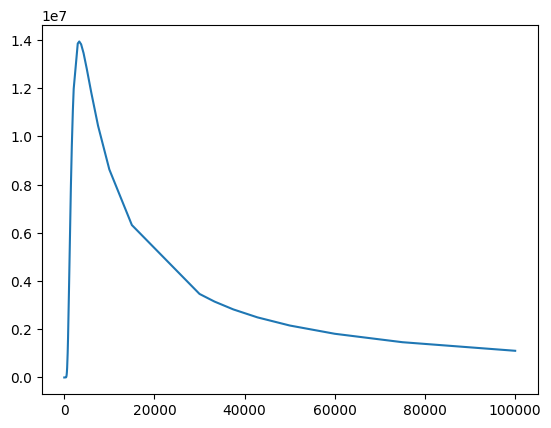

In [55]:
# plot the data
plt.plot(CMB_data['Wavelength (microns)'], CMB_data['photons s-1 micron-1'])

# As we can see, CMB is non existent below 8 microns, so we can just set it to 0